# Course software setup

-   Your laptops have been set up with the software you need for this course, including:
    -   docker
    -   GitHub desktop

## Course setup

You can always download a current copy of the course notes, assignments, and exams with git.  The easiest way is to use [Git Desktop](https://desktop.github.com/).  Install it, and clone the course repository (zulissi/f18-06625).  This will put a copy of the course info in Documents/GitHub/f18-06625.  

You will also need [docker](https://www.docker.com/get-started). It should already be installed on your department laptop

## Installing the course docker image

We will use docker to distribute a complete python environment to do everything you need for the course.  This docker image is a complete linux+python environment.  Every time you run it the settings will be fresh to ensure that your environment matches the course one. This is a standard way to distribute complete environments in the computer science world. 

At any point, you can fetch the latest version of the docker image by opening the start menu, finding the command prompt, right clicking and selecting "Run as administrator". In the command prompt that opens, enter:
~~~~
docker pull zulissi/jupyter_06625
~~~~
to pull the most recent image of the jupyter environment.  You can close the command prompt, this is the only time you need to run as an administrator.




### Updating the docker environment

At any point, you can fetch the latest version of the docker image by opening the start menu, finding the command prompt, right clicking and selecting "Run as administrator". In the command prompt that opens, enter:
~~~~
docker pull zulissi/jupyter_06625
~~~~
to pull the most recent image of the jupyter environment.  You can close the command prompt, this is the only time you need to run as an administrator.

### Starting the jupyter/docker environment

To start the jupyter environment, use the "launch_docker.bat" script in the f18-06625 repo.

After running this command, you should be able to open your favorite internet browser and go to [localhost:8888](http://localhost:8888), where you will see a jupyter notebook shell and you should see your course documents.

When you're finished working with jupyter for this course, you can close it by returning to the command prompt that should still be running, and pressing 'ctrl+c'.  It will ask you to verify that you want to shut down, so follow the question and type 'y' then 'enter'.

## Python setup

The included jupyter notebook environment has python 3.6 installed, as well as a number of helpful packages like
-  numpy
-  scipy
-  matplotlib

and others.  Let's check to see the version of various installed packages.  Click on the code below, and press "shift+enter" to evaluate the block.  

In [1]:
import numpy
print('numpy version {}'.format(numpy.__version__))

import scipy
print('scipy version {}'.format(scipy.__version__))

import matplotlib
print('matplotlib version {}'.format(matplotlib.__version__))

import quantities
print('quantities version {}'.format(quantities.__version__))

import uncertainties
print('uncertainties version {}'.format(uncertainties.__version__))

import pycse
print('pycse version {}'.format(pycse.__version__))

numpy version 1.15.1
scipy version 1.1.0
matplotlib version 2.2.3
quantities version 0.12.1+6.g1ef120b
uncertainties version 3.0.2
pycse version 2.0.0


In [3]:
a=5
b = 50
print(a)
print('a = {}, b = {}'.format(a, b))
print('a = ' + str(a))
# print('a = ' + a) gives an error
print('the ' + 'quick brown fox')

5
a = 5, b = 50
a = 5
the quick brown fox


## Assignments and exercises

-   Most assignments will be listed as links in the syllabus
-   Sometimes there will be "Exercises" that we do in class. These will not always be graded, but they will be used as part of a participation grade. Make sure you bring your computer to class.



In [1]:
for i in range(5):
    print(i)
    # do something else

0
1
2
3
4


# Introduction to the course

## What is Chemical Reaction Engineering?

-   The design of processes that transform lower value feedstocks to higher value products through chemical reactions.

We answer questions such as:

1.  Can we make a product at an economical rate?
2.  How big should a reactor be to make a product at some rate?
3.  How much heat should I remove from a reactor to maintain a safe temperature?
4.  What kind of reactor gives the highest yield?
5.  etc&#x2026;



## We are engineers

We get paid to answer those questions

-   *quantitatively*
    -   It will rarely be sufficient to qualitatively answer questions
-   with uncertainty and risk analysis
-   even when the problems are very hard



## Role of computational tools



-   Many problems are too hard to solve by hand and must be solved numerically.
    -   For these we use computational methods

-   We will extensively use Python to numerically solve problems in this course.

-   Why?
    -   Python is *free*
    -   You can use this anywhere you go
    -   Python does everything we need and much more

-   Almost every class will use and show examples of python
-   These notes will be available to you through the syllabus
-   You should make sure you can run the examples, *and that you get the same results*
-   **Ask questions when you do not understand**

-   We will extensively use jupyter notebooks in this class
    -   to read course notes
    -   to solve computational problems
    -   to document our work, analysis, and discussion



## Python examples



### A simple plot



Here we import functionality from python modules to get array math functions and to make a plot.
Put your cursor in this code block and press shift-enter.

Let us review some python documentation. Click on these links to learn more about these functions:
[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
[numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

[matplotlib.pyplot.plot](https://www.google.com/#safe=off&q=matplotlib.pyplot.plot)
[matplotlib.pyplot.xlabel](https://www.google.com/#safe=off&q=matplotlib.pyplot.xlabel)
[matplotlib.pyplot.ylabel](https://www.google.com/#safe=off&q=matplotlib.pyplot.ylabel)
[matplotlib.pyplot.savefig](https://www.google.com/#safe=off&q=matplotlib.pyplot.savefig)



50


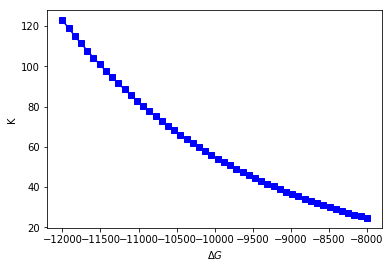

In [3]:
import numpy as np               # standard import for array functions
import matplotlib.pyplot as plt  # standard import for plotting

# Define some constants
R = 8.314   # A float
T = 300     # an integer

# an array of values linearly spaced
deltaG = np.linspace(-8000, -12000, num=50)

print(len(deltaG))

# plotting commands
plt.plot(deltaG, np.exp(-deltaG / R / T), 'bs-')
plt.xlabel('$\Delta G$')  # Note the $ $
plt.ylabel('K')
#plt.savefig('images/K.png')
plt.show()

### Solve nonlinear equations



Suppose we know K at some temperature, and we want to compute the corresponding $\Delta G$? Say we know K = 100 at 300K.  We need to solve $100 = e^{-\Delta G/RT}$ for $\Delta G$ at T = 300 K. Numerically,  we need to find the value of $\Delta G$ that solves this equivalent equation:

$$0 = 100 - e^{-\Delta G/RT}$$

We have to provide a guess for the solution because this is a nonlinear function we are solving. We could solve this problem analytically, but we are not going to. Instead, we will use the analytical solution to show our numerical solution is correct.

[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

Put your cursor in this code block and press Ctrl-c Ctrl-c (C-c C-c) to run the block.



In [6]:
import numpy as np                  # array based math functions
from scipy.optimize import fsolve   # nonlinear algebra solver

R = 8.314  # J/mol/K
T = 300    # K

# define a function that equals zero at the solution


def objective(deltaG):
    return 100 - np.exp(-deltaG / R / T)


guess = -11000   # guess based on the graph we saw before
ans, = fsolve(objective, guess)  # the , is an unpacking operator

print(ans)
print(type(ans))
print(-np.log(100) * R * T)  # analytical solution

-11486.2154779
<class 'numpy.float64'>
-11486.2154779


You can see the two solutions are equivalent. Checkout [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)



### Solving another nonlinear algebra problem



Given $C_A = C_{A0} e^{-k t}$ with $C_{A0} =1$ mol/L, and $k=0.23$ 1/s, how long will it take before $C_A$ = 0.2 M? We want to know at what time is this equation true: $0.2 - C_{A0} e^{-k t} = 0$. We define two functions here, one for $C_A$, and one for the objective function ($f(x)=0$). That is so we can evaluate $C_A(t_{soln})$ conveniently later.



In [7]:
import numpy as np
from scipy.optimize import fsolve

CA0 = 1.0  # mol / l
k = 0.23  # 1/s


def Ca(t):
    return CA0 * np.exp(-k * t)


def f(t):
    z = 0.2 - Ca(t)
    return z


ans, d, flag, msg = fsolve(f, 2.0, full_output=1)
print(ans)

print('Ca = {1} at t = {0:1.2f} s ({1})'.format(ans[0], Ca(ans)))

[ 6.99755614]
Ca = [ 0.2] at t = 7.00 s ([ 0.2])


You should practice with these examples. Review these links:

[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

[numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)  [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)



# Getting help



-   I am expecting you will need help. Python is probably new to you.

You may find these resources helpful:

-   Class
    -   Come to class everyday.
    -   Watch me use Python/Jupyter
    -   Ask questions about things you do not understand

-   Learning python
    -   [http://learnpythonthehardway.org/book/](http://learnpythonthehardway.org/book/)
    -   [http://interactivepython.org/courselib/static/thinkcspy/index.html](http://interactivepython.org/courselib/static/thinkcspy/index.html)

-   Python documentation
    -   Builtin modules - [http://docs.python.org/3/library/index.html](http://docs.python.org/3/library/index.html)

-   Python and scientific computing
    -   [http://kitchingroup.cheme.cmu.edu/pycse/>](http://kitchingroup.cheme.cmu.edu/pycse/>)(there is also a pdf version)
    -   Numerical python - [http://docs.scipy.org/doc/numpy/reference/](http://docs.scipy.org/doc/numpy/reference/)
    -   Scientific python - [http://docs.scipy.org/doc/scipy/reference/](http://docs.scipy.org/doc/scipy/reference/)

-   Writing equations in LaTeX: [http://www.codecogs.com/latex/eqneditor.php](http://www.codecogs.com/latex/eqneditor.php)





# Final points



1.  Avoid installing a new Python



In [7]:
def f(a, b):
    return 2 * a, 3 * b

g = f(1, 2)
print(g)

a, b = f(1, 2)
print(a)
print(b)

h, j, k = [3, 4, 5]
print(h)

(2, 6)
2
6
3


In [5]:
print(1 / 3.0)

0.3333333333333333


In [6]:
print(1/3)

0.3333333333333333
